In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

По данным опроса, 75% работников ресторанов утверждают, что испытывают на работе существенный стресс, оказывающий негативное влияние на их личную жизнь. Крупная ресторанная сеть опрашивает 100 своих работников, чтобы выяснить, отличается ли уровень стресса работников в их ресторанах от среднего. 67 из 100 работников отметили высокий уровень стресса.

Посчитайте достигаемый уровень значимости, округлите ответ до четырёх знаков после десятичной точки.

In [2]:
n = 100
prob = 0.75
F_H0 = stats.binom(n, prob)

(60, 90)

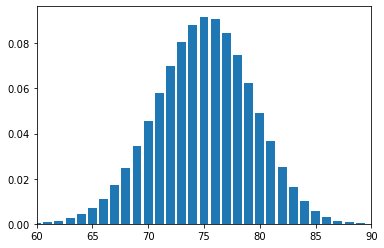

In [7]:
x = np.linspace(0,100,101)

plt.bar(x, F_H0.pmf(x), align = 'center')
plt.xlim(60, 90) 

In [8]:
print('p-value: %.4f' % stats.binom_test(67, 100, prob))

p-value: 0.0822


Представим теперь, что в другой ресторанной сети только 22 из 50 работников испытывают существенный стресс. Гипотеза о том, что 22/50 соответствует 75% по всей популяции, методом, который вы использовали в предыдущей задаче, отвергается. Чем это может объясняться? Выберите все возможные варианты.

In [9]:
print('p-value: %.10f' % stats.binom_test(22, 50, prob))

p-value: 0.0000034831


The Wage Tract — заповедник в округе Тома, Джорджия, США, деревья в котором не затронуты деятельностью человека со времён первых поселенцев. Для участка заповедника размером 200х200 м имеется информация о координатах сосен (sn — координата в направлении север-юг, we — в направлении запад-восток, обе от 0 до 200).

Проверим, можно ли пространственное распределение сосен считать равномерным, или они растут кластерами.

In [11]:
pines = pd.read_table('pines.txt')

In [12]:
pines.head()

,sn,we
0,200.0,8.8
1,199.3,10.0
2,193.6,22.4
3,167.7,35.6
4,183.9,45.4


In [13]:
pines.describe()

,sn,we
count,584.000000,584.000000
mean,98.735274,113.829281
std,56.523154,49.810725
min,0.000000,0.000000
25%,52.050000,79.125000
50%,101.450000,121.900000
75%,149.400000,149.725000
max,200.000000,200.000000


Загрузите данные, поделите участок на 5х5 одинаковых квадратов размера 40x40 м, посчитайте количество сосен в каждом квадрате (чтобы получить такой же результат, как у нас, используйте функцию scipy.stats.binned_statistic_2d).

In [15]:
bins = stats.binned_statistic_2d(pines.sn, pines.we, None, statistic='count', bins=[5, 5])

In [18]:
observed_frequences = bins.statistic
observed_frequences

array([[18., 26., 29., 25., 20.],
       [14., 12., 22., 34., 25.],
       [12., 24., 15., 50., 37.],
       [ 8., 19., 31., 50.,  7.],
       [ 7.,  8., 37., 27., 27.]])

Если сосны действительно растут равномерно, какое среднее ожидаемое количество сосен в каждом квадрате? В правильном ответе два знака после десятичной точки.

In [19]:
mean_trees = np.mean(observed_frequences)
mean_trees

23.36

Чтобы сравнить распределение сосен с равномерным, посчитайте значение статистики хи-квадрат для полученных 5х5 квадратов. Округлите ответ до двух знаков после десятичной точки.

In [20]:
expected_frequences = mean_trees*np.ones((5,5))
expected_frequences

array([[23.36, 23.36, 23.36, 23.36, 23.36],
       [23.36, 23.36, 23.36, 23.36, 23.36],
       [23.36, 23.36, 23.36, 23.36, 23.36],
       [23.36, 23.36, 23.36, 23.36, 23.36],
       [23.36, 23.36, 23.36, 23.36, 23.36]])

In [31]:
statistic = stats.chisquare(observed_frequences.reshape(25), expected_frequences.reshape(25), ddof = 0)
statistic

Power_divergenceResult(statistic=150.58904109589042, pvalue=2.574669774967279e-20)

In [33]:
round(statistic[0], 2)

150.59